In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = pd.read_csv('colors.csv', sep = ',')
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [3]:
parts = pd.read_csv('inventory_parts.csv', sep = ',')
parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f
...,...,...,...,...,...
580246,18708,99206,0,3,f
580247,18708,99207,71,4,f
580248,18708,99780,15,4,f
580249,18708,99780,0,9,f


In [4]:
nazwa = colors['name'].tolist()   # wyodrębniam nazwy kolorów do listy
kolor_html = colors['rgb'].apply(lambda x: '#'+x).tolist()   # dodaje do nazwy koloru rgb # aby kod pózniej odczytał je jako kolory

In [5]:
colors_set = dict(zip(colors.name, colors.rgb))   # tu spinam w słownik kolumny z nazwami i kolorami

In [6]:
color_count = parts['color_id'].value_counts()   #tu liczę ile razy występuje dane color id

In [7]:
colors_id = dict(zip(colors.id, colors.rgb))   # tu spinam w słownik kolumny z color id i kolorami z #
parts['color'] = parts['color_id'].apply(lambda id : colors_id[id])   # dodaję kolumnę 'color' do dataframu 'parts' tak, aby
# id koloru miał przypisany swój kolor rgb

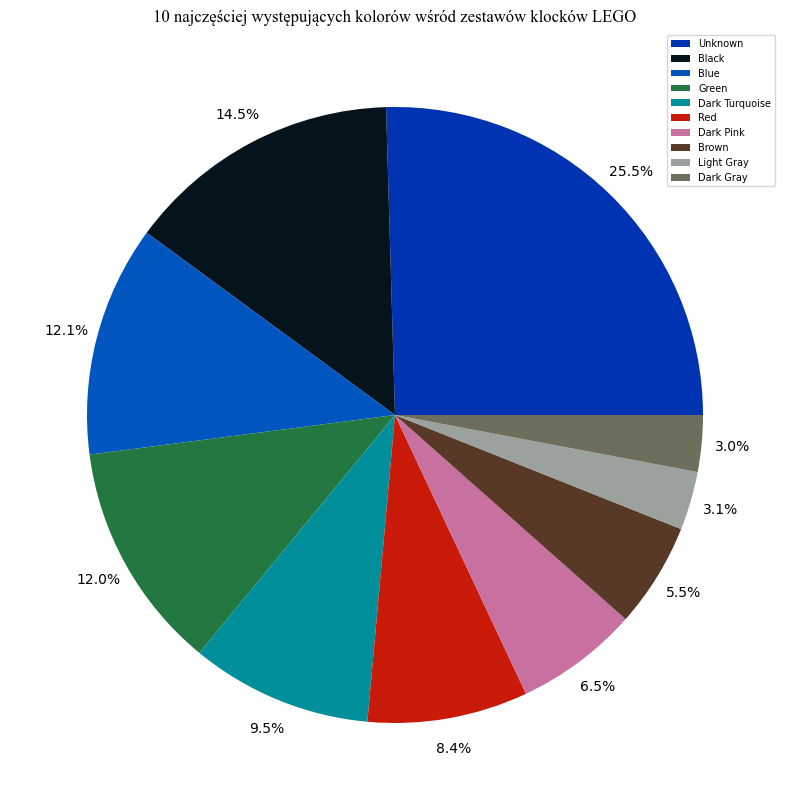

In [11]:
y = parts['color'].value_counts()[:10]   # wybieram top 10 kolorów z tej kolumny pod względem częstości występowania

fig, ax = plt.subplots(figsize = (15, 10))

kolor = kolor_html   # przypisuje kolory z hashtagiem

plt.pie(y, colors = kolor, autopct = '%1.1f%%', pctdistance = 1.1)   # autopct dodaje procenty a pctdistance dystans od środka koła
plt.legend(nazwa, fontsize = 7)

plt.title('10 najczęściej występujących kolorów wśród zestawów klocków LEGO', fontname = 'Times New Roman')

plt.savefig('Wykres kołowy - kolory LEGO.pdf')
plt.show()